In [1]:
import keras
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)
print(x_train.shape, y_train.shape)
import keras.utils as np_utils
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = np_utils.to_categorical(y_train[:,0])
y_test = np_utils.to_categorical(y_test[:,0])
num_classes = y_test.shape[1]
print(y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 10)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

model = Sequential()

# Convolutional layers
model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer for regularization
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())
# Fully connected layers
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
# Output layer for binary classification
model.add(Dense(10, activation='softmax'))

# Model summary
model.summary()

# Compile the model
optimizer_task = tf.keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer_task, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 16)        64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                        

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
import matplotlib.pyplot as plt
def check_classificator(H, disp_extra=True):

    testResults_task1 = model.predict(x_test)
    confMat = confusion_matrix(y_test.argmax(axis=1), testResults_task1.argmax(axis=1))
    if disp_extra == True:
        print(confMat)
        print(classification_report(y_test.argmax(axis=1), testResults_task1.argmax(axis=1)))
    print("Cohen's Kappa: {}".format(cohen_kappa_score(y_test.argmax(axis=1), testResults_task1.argmax(axis=1))))
    print("Accuracy: ",accuracy_score(y_test.argmax(axis=1), testResults_task1.argmax(axis=1)))
    plt.imshow(confMat, cmap='hot', interpolation='nearest')
    plt.colorbar()  # Dodaj pasek kolorów

    plt.show()


In [5]:
H_base = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=128, verbose=1)

Epoch 1/30
391/391 [==============================] - 12s 11ms/step - loss: 1.3999 - accuracy: 0.4993 - val_loss: 2.1542 - val_accuracy: 0.3299
Epoch 2/30
391/391 [==============================] - 3s 8ms/step - loss: 1.0274 - accuracy: 0.6356 - val_loss: 1.0689 - val_accuracy: 0.6218
Epoch 3/30
391/391 [==============================] - 4s 9ms/step - loss: 0.8750 - accuracy: 0.6899 - val_loss: 0.8854 - val_accuracy: 0.6848
Epoch 4/30
391/391 [==============================] - 3s 8ms/step - loss: 0.7797 - accuracy: 0.7242 - val_loss: 0.9461 - val_accuracy: 0.6746
Epoch 5/30
391/391 [==============================] - 3s 8ms/step - loss: 0.7056 - accuracy: 0.7509 - val_loss: 0.7656 - val_accuracy: 0.7353
Epoch 6/30
391/391 [==============================] - 3s 8ms/step - loss: 0.6477 - accuracy: 0.7708 - val_loss: 1.2185 - val_accuracy: 0.6203
Epoch 7/30
391/391 [==============================] - 4s 9ms/step - loss: 0.5926 - accuracy: 0.7909 - val_loss: 1.0412 - val_accuracy: 0.6597
Epoc

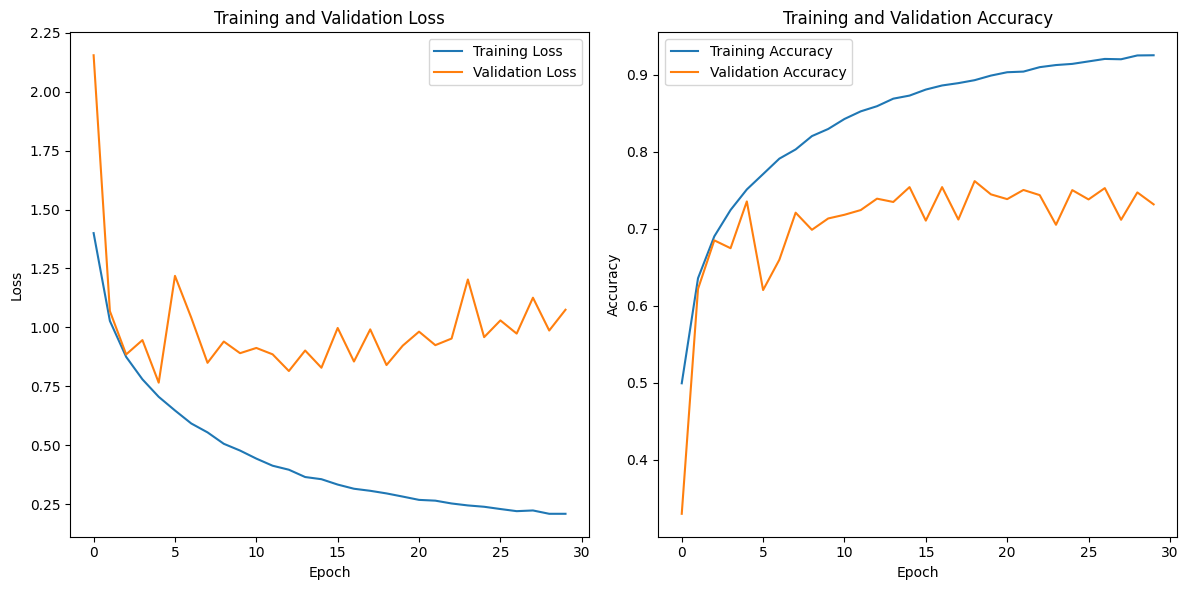

313/313 [==============================] - 1s 2ms/step
Cohen's Kappa: 0.7016666666666667
Accuracy:  0.7315


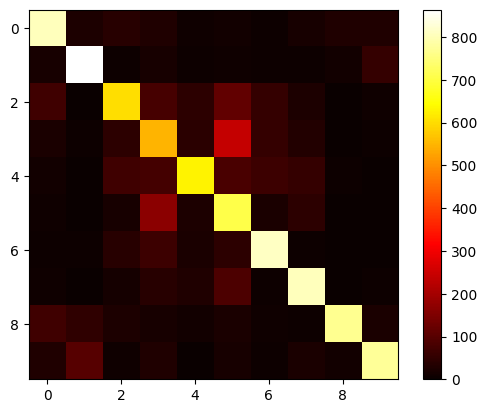

In [6]:
check_classificator(H_base, disp_extra = False)

In [7]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
model.save("base.tf", save_format='tf')
model.save_weights("base_weights.tf")

Baseline Error: 26.85%


In [16]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("base.tf")

# Optionally, load the weights
model.load_weights("base_weights.tf")

In [9]:
for i, layer in enumerate(model.layers):
    print(i, layer)

0 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7863c9309240>
1 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7863c9309c30>
2 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7863c930a740>
3 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7863c930a3b0>
4 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7863c930a440>
5 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7863c9308910>
6 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7863c9309ed0>
7 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7863c930abc0>
8 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x78636cade0b0>
9 <keras.src.layers.regularization.dropout.Dropout object at 0x78636cadd510>
10 <keras.src.layers.reshaping.flatten.Flatten object at 0x78636cadf2e0>
11 <keras.src.layers.core.dense.Dense object at 0x78636cadc250>
12 <keras.src.layers.cor

Training with freeze - unlock


In [17]:
import numpy as np
iterations = 0
kernel_freez = np.array(range(0,5))
print("Kernel for training layers", (kernel_freez))

HistoryLayers_vl = []
HistoryLayers_va = []
HistoryLayers_l = []
HistoryLayers_a = []

while kernel_freez[-1] != len(model.layers) - 1:
  # do while last value of kernel is not equal to last index of layer
  for i, layer in enumerate(model.layers):
    if i >= kernel_freez[0] and i <= kernel_freez[-1]:
      # activate layers from kernel
      layer.trainable = True
    else:
      layer.trainable = False
    print(f"layer[{i}] trainable: ", layer.trainable)
  kernel_freez += 1
  import matplotlib.pyplot as plt
  import numpy as np

  H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4, batch_size=128, verbose=1)
  HistoryLayers_vl = np.append(HistoryLayers_vl, H.history['val_loss'])
  HistoryLayers_va = np.append(HistoryLayers_va, H.history['val_accuracy'])
  HistoryLayers_l = np.append(HistoryLayers_l, H.history['loss'])
  HistoryLayers_a = np.append(HistoryLayers_a, H.history['accuracy'])

Kernel for training layers [0 1 2 3 4]
layer[0] trainable:  True
layer[1] trainable:  True
layer[2] trainable:  True
layer[3] trainable:  True
layer[4] trainable:  True
layer[5] trainable:  False
layer[6] trainable:  False
layer[7] trainable:  False
layer[8] trainable:  False
layer[9] trainable:  False
layer[10] trainable:  False
layer[11] trainable:  False
layer[12] trainable:  False
layer[13] trainable:  False
Epoch 1/4
391/391 [==============================] - 7s 11ms/step - loss: 0.2002 - accuracy: 0.9289 - val_loss: 1.0200 - val_accuracy: 0.7439
Epoch 2/4
391/391 [==============================] - 4s 10ms/step - loss: 0.1984 - accuracy: 0.9300 - val_loss: 1.0593 - val_accuracy: 0.7406
Epoch 3/4
391/391 [==============================] - 4s 11ms/step - loss: 0.1999 - accuracy: 0.9280 - val_loss: 1.1331 - val_accuracy: 0.7263
Epoch 4/4
391/391 [==============================] - 4s 11ms/step - loss: 0.1910 - accuracy: 0.9312 - val_loss: 1.0761 - val_accuracy: 0.7411
layer[0] trainab

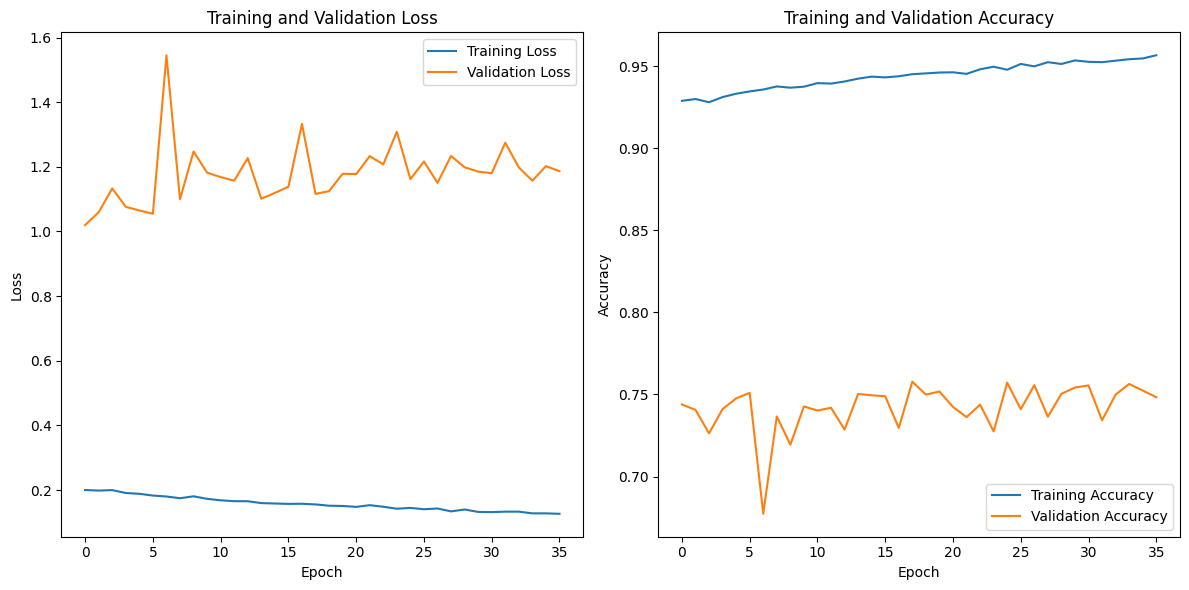

Baseline Error: 25.17%
313/313 [==============================] - 1s 2ms/step
Cohen's Kappa: 0.7203333333333334
Accuracy:  0.7483


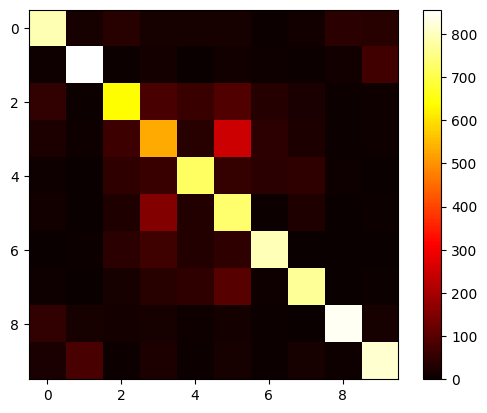

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Update the plot within the loop
axs[0].clear()
axs[0].plot(HistoryLayers_l, label='Training Loss')
axs[0].plot(HistoryLayers_vl, label='Validation Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].clear()
axs[1].plot(HistoryLayers_a, label='Training Accuracy')
axs[1].plot(HistoryLayers_va, label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

fig.tight_layout()
plt.pause(0.01)  # Pause to allow time for the plot to update

plt.show()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

testResults_task1 = model.predict(x_test)
confMat = confusion_matrix(y_test.argmax(axis=1), testResults_task1.argmax(axis=1))
print("Cohen's Kappa: {}".format(cohen_kappa_score(y_test.argmax(axis=1), testResults_task1.argmax(axis=1))))
print("Accuracy: ",accuracy_score(y_test.argmax(axis=1), testResults_task1.argmax(axis=1)))
plt.imshow(confMat, cmap='hot', interpolation='nearest')
plt.colorbar()  # Dodaj pasek kolorów

plt.show()
del model

Training with freez - lock

In [20]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("base.tf")

# Optionally, load the weights
model.load_weights("base_weights.tf")

In [21]:
import numpy as np
kernel_freez = np.array(range(0,5))

HistoryLayers_vl = []
HistoryLayers_va = []
HistoryLayers_l = []
HistoryLayers_a = []

while kernel_freez[-1] != len(model.layers) - 1:
  # do while last value of kernel is not equal to last index of layer
  for i, layer in enumerate(model.layers):
    if i >= kernel_freez[0] and i <= kernel_freez[-1]:
      # activate layers from kernel
      layer.trainable = False
    else:
      layer.trainable = True
    print(f"layer[{i}] trainable: ", layer.trainable)
  kernel_freez += 1
  import matplotlib.pyplot as plt
  import numpy as np


  H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4, batch_size=128, verbose=1)
  HistoryLayers_vl = np.append(HistoryLayers_vl, H.history['val_loss'])
  HistoryLayers_va = np.append(HistoryLayers_va, H.history['val_accuracy'])
  HistoryLayers_l = np.append(HistoryLayers_l, H.history['loss'])
  HistoryLayers_a = np.append(HistoryLayers_a, H.history['accuracy'])

layer[0] trainable:  False
layer[1] trainable:  False
layer[2] trainable:  False
layer[3] trainable:  False
layer[4] trainable:  False
layer[5] trainable:  True
layer[6] trainable:  True
layer[7] trainable:  True
layer[8] trainable:  True
layer[9] trainable:  True
layer[10] trainable:  True
layer[11] trainable:  True
layer[12] trainable:  True
layer[13] trainable:  True
Epoch 1/4
391/391 [==============================] - 7s 11ms/step - loss: 0.2041 - accuracy: 0.9269 - val_loss: 1.0798 - val_accuracy: 0.7437
Epoch 2/4
391/391 [==============================] - 3s 9ms/step - loss: 0.2027 - accuracy: 0.9267 - val_loss: 1.1798 - val_accuracy: 0.7214
Epoch 3/4
391/391 [==============================] - 3s 8ms/step - loss: 0.1947 - accuracy: 0.9291 - val_loss: 1.0183 - val_accuracy: 0.7503
Epoch 4/4
391/391 [==============================] - 3s 8ms/step - loss: 0.1862 - accuracy: 0.9332 - val_loss: 1.0784 - val_accuracy: 0.7427
layer[0] trainable:  True
layer[1] trainable:  False
layer[2] 

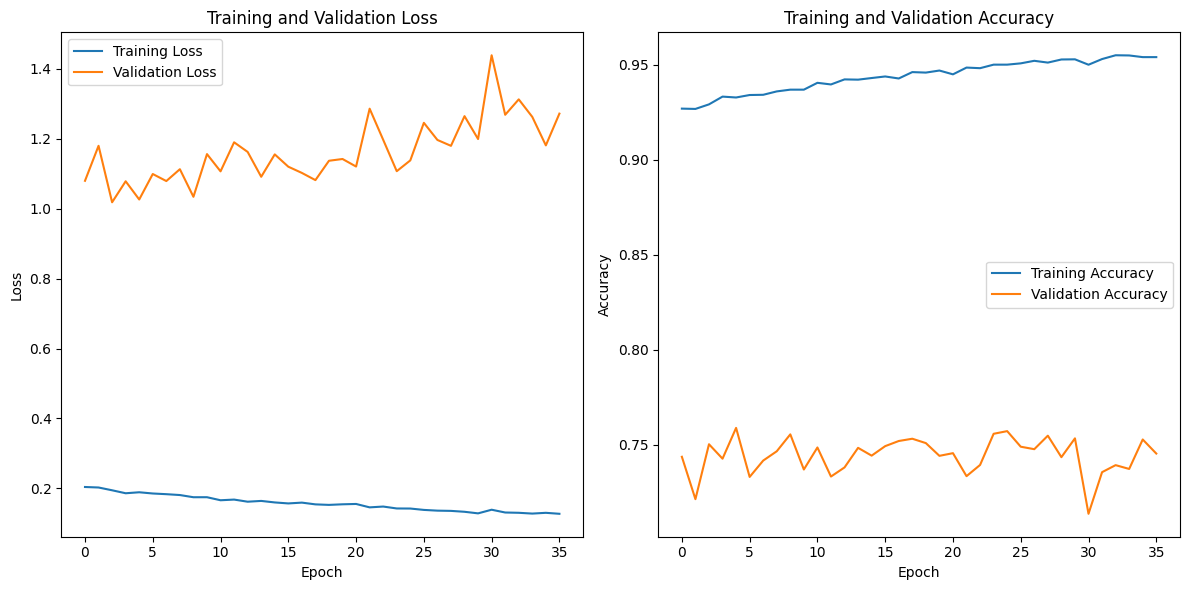

Baseline Error: 25.46%
313/313 [==============================] - 1s 2ms/step
Cohen's Kappa: 0.717111111111111
Accuracy:  0.7454


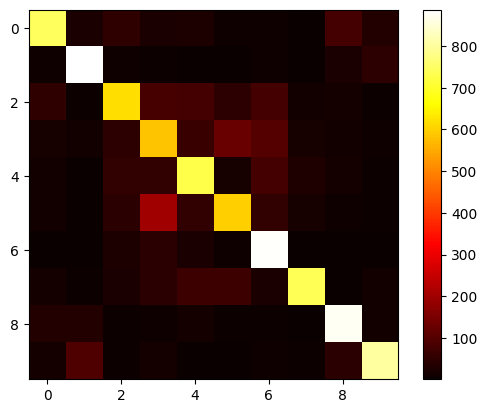

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Update the plot within the loop
axs[0].clear()
axs[0].plot(HistoryLayers_l, label='Training Loss')
axs[0].plot(HistoryLayers_vl, label='Validation Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].clear()
axs[1].plot(HistoryLayers_a, label='Training Accuracy')
axs[1].plot(HistoryLayers_va, label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

fig.tight_layout()
plt.pause(0.01)  # Pause to allow time for the plot to update

plt.show()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

testResults_task1 = model.predict(x_test)
confMat = confusion_matrix(y_test.argmax(axis=1), testResults_task1.argmax(axis=1))

print("Cohen's Kappa: {}".format(cohen_kappa_score(y_test.argmax(axis=1), testResults_task1.argmax(axis=1))))
print("Accuracy: ",accuracy_score(y_test.argmax(axis=1), testResults_task1.argmax(axis=1)))
plt.imshow(confMat, cmap='hot', interpolation='nearest')
plt.colorbar()  # Dodaj pasek kolorów

plt.show()